In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack, stats
import numpy as np

In [2]:
x = np.linspace(0,89,90)
y = np.sin(x) + np.random.normal(0, .02, len(x))
z = np.cos(x) + np.random.normal(0, .02, len(x))

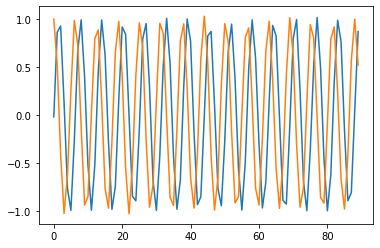

In [3]:
plt.plot(x,y)
plt.plot(x,z)

In [4]:
A = fftpack.fft(y)
B = fftpack.fft(z)
Ar = -A.conjugate()
Br = -B.conjugate()
Tc_r = np.argmax(np.abs(fftpack.ifft(Ar*B)))
Tc = np.argmax(np.abs(fftpack.ifft(A*Br)))

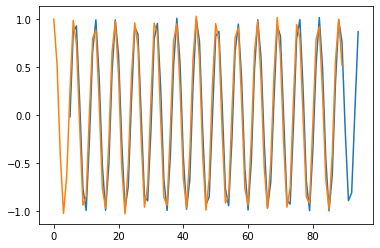

In [5]:
plt.plot(x+Tc,y)
# plt.plot(abs(np.array(x-Tc_r)[::-1]),y)
plt.plot(x,z)

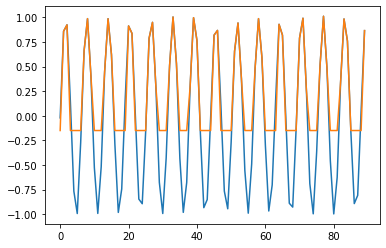

In [21]:
plt.plot(y)
plt.plot(np.where(y>0.25,y,-0.15))


In [7]:
# Pearson corr and p val 
stats.pearsonr(y,z)

(0.016649850579023472, 0.8762244333688205)

In [8]:
# verify w numpy
corrmat = np.corrcoef(y,z)
np.nanmedian(corrmat[np.where(~np.eye(corrmat.data.shape[0], dtype=bool))].data)

0.016649850579023486

In [9]:
# in this case, normalizing doesn't make a difference

In [10]:
a = (y - np.mean(y)) / (np.std(y) * len(y))
b = (z - np.mean(z)) / (np.std(z))
c = np.corrcoef(a, b)

In [11]:
np.nanmedian(c[np.where(~np.eye(c.data.shape[0], dtype=bool))].data)

0.01664985057902349